<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Again per broken code try simpler setup that I used in the class;

If code runs but can't be shown is not useful

Scatter plot lexp and hdi label useful points

Nice nonlinear graph

I'd make these graphs smaller

I like the scatter plot matrix

What's the bottom line though, major punchline or finding

Could streamline and focus more on the story!

Yes there is conclusion, but could add complexity and nuance

eg can maybe do relationships for different decades say in 1990 v 2020 

The Human Development Index (HDI) is a tool to measure human development condition by showing several indicators: life expectancy, years of schooling, and income. 

The Gender Development Index (GDI) measures gender inequalities in three dimensions between male and female: education, health, and income.

The Gender Inequality Index (GII) measures the gender inequality condition in different countries. 

In this project, I will try to explore the relationship among HDI and its influencing factors, and see the gap between male and female in education, health, and income.

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

1. Gender Development Index

In [ ]:
gd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Development%20Index.xlsx?raw=true")

In [ ]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SDG3,NaN,NaN,NaN,SDG4.3,NaN,NaN,NaN,SDG4.4,NaN,NaN,NaN,SDG8.5,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Development Index,NaN,NaN,NaN,Human Development Index,NaN,NaN,NaN,Life expectancy at birth,NaN,NaN,NaN,Expected years of schooling,NaN,NaN,NaN,Mean years of schooling,NaN,NaN,NaN,Estimated gross national income per capita,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Value,NaN,NaN,NaN,(years),NaN,NaN,NaN,(years),NaN,NaN,NaN,(years),NaN,NaN,NaN,(2017 PPP $),NaN,NaN
4,HDI rank,Country,Value,NaN,Group,NaN,Female,NaN,Male,NaN,Female,NaN,Male,NaN,Female,NaN,Male,NaN,Female,NaN,Male,NaN,Female,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd=gd[6:197]

In [ ]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd1 = gd.copy()

In [ ]:
gd1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd1.rename(columns={'Unnamed: 0':'rank'},inplace=True)
gd1.rename(columns={'Unnamed: 1':'country'},inplace=True)

In [ ]:
gd1 #question: why only one name be changed with the same code? 
#aok to make sure you got the exact correct name best to copy paste; here it is 'Unnamed: 0' --there is a space!

,rank,country,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd1.rename(columns={'Unnamed: 2':'Gender Development Index'},inplace=True)
gd1.rename(columns={'Unnamed: 6':'HDI Female'},inplace=True)
gd1.rename(columns={'Unnamed: 8':'HDI Male'},inplace=True)
gd1.rename(columns={'Unnamed: 10':'Life expectancy at birth female'},inplace=True)
gd1.rename(columns={'Unnamed: 12':'Life expectancy at birth male'},inplace=True)
gd1.rename(columns={'Unnamed: 14':'Expected years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed: 16':'Expected years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed: 18':'Mean years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed: 20':'Mean years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed: 22':'GNI female'},inplace=True)
gd1.rename(columns={'Unnamed: 24':'GNI male'},inplace=True)

In [ ]:
gd1.columns

Index(['rank', 'country', 'Gender Development Index', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'HDI Female', 'Unnamed: 7', 'HDI Male',
       'Unnamed: 9', 'Life expectancy at birth female', 'Unnamed: 11',
       'Life expectancy at birth male', 'Unnamed: 13',
       'Expected years of schooling female', 'Unnamed: 15',
       'Expected years of schooling male', 'Unnamed: 17',
       'Mean years of schooling female', 'Unnamed: 19',
       'Mean years of schooling male', 'Unnamed: 21', 'GNI female',
       'Unnamed: 23', 'GNI male'],
      dtype='object')

In [ ]:
gd1

,rank,country,Gender Development Index,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDI Female,Unnamed: 7,HDI Male,Unnamed: 9,Life expectancy at birth female,Unnamed: 11,Life expectancy at birth male,Unnamed: 13,Expected years of schooling female,Unnamed: 15,Expected years of schooling male,Unnamed: 17,Mean years of schooling female,Unnamed: 19,Mean years of schooling male,Unnamed: 21,GNI female,Unnamed: 23,GNI male
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
gd1

,rank,country,Gender Development Index,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDI Female,Unnamed: 7,HDI Male,Unnamed: 9,Life expectancy at birth female,Unnamed: 11,Life expectancy at birth male,Unnamed: 13,Expected years of schooling female,Unnamed: 15,Expected years of schooling male,Unnamed: 17,Mean years of schooling female,Unnamed: 19,Mean years of schooling male,Unnamed: 21,GNI female,Unnamed: 23,GNI male
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [ ]:
gd2 = gd1.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23'], axis=1)

In [ ]:
gd2

,rank,country,Gender Development Index,HDI Female,HDI Male,Life expectancy at birth female,Life expectancy at birth male,Expected years of schooling female,Expected years of schooling male,Mean years of schooling female,Mean years of schooling male,GNI female,GNI male
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
from scipy.stats.mstats import gmean
from scipy.stats.stats import pearsonr

%matplotlib inline

sns.set(rc={"figure.figsize": (20,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 }, 
        palette=sns.color_palette("OrRd_d", 20))

import warnings
warnings.filterwarnings('ignore')

In [ ]:
colorscale = [[0.0, 'rgb(255, 255, 255)'], [0.2, 'rgb(234, 250, 234)'], [0.4, 'rgb(173, 235, 173)'],\
              [0.6, 'rgb(91, 215, 91)'], [0.8, 'rgb(45, 185, 45)'], [1.0, 'rgb(31, 122, 31)']]
data = [dict(
        type='choropleth',
        locations=gd2.country,
        locationmode='country names',
        z=gd2,
        text=gd2.country,
        colorscale = colorscale,
        colorbar=dict(autotick=False, tickprefix='', title='GDI'),
)]
layout = dict(
            title = 'Gender Development',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

TypeError: ignored

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [ ]:
gd2.columns

Index(['rank', 'country', 'Gender Development Index', 'HDI Female', 'HDI Male',
       'Life expectancy at birth female', 'Life expectancy at birth male',
       'Expected years of schooling female',
       'Expected years of schooling male', 'Mean years of schooling female',
       'Mean years of schooling male', 'GNI female', 'GNI male'],
      dtype='object')

In [ ]:
trace1 = go.Box(
    y=gd2.iloc[:, 3],
    name = "HDI Female"
)
trace2 = go.Box(
    y=gd2.iloc[:, 4],
    name = "HDI Male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Estimated Gross National Income per Capita"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show() #aok now works

In [ ]:
trace1 = go.Box(
    y=gd2["Life expectancy at birth female"],
    name = "Life Expectancy at Birth (Female)"
)
trace2 = go.Box(
    y=gd2["Life expectancy at birth male"],
    name = "Life Expectancy at Birth (Male)"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Life Expectancy According To Years"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show() #aok now works

In [ ]:
trace1 = go.Box(
    y=gd2.iloc[:, 7],
    name = "Expected years of schooling female"
)
trace2 = go.Box(
    y=gd2.iloc[:, 8],
    name = "Expected years of schooling male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Expected years of schooling"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show()

In [ ]:
trace1 = go.Box(
    y=gd2.iloc[:, 9],
    name = "Mean years of schooling female"
)
trace2 = go.Box(
    y=gd2.iloc[:, 10],
    name = "Mean years of schooling male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Mean years of schooling"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show()

In [ ]:
trace1 = go.Box(
    y=gd2.iloc[:, 11],
    name = "GNI Female"
)
trace2 = go.Box(
    y=gd2.iloc[:, 12],
    name = "GNI Male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Income"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show()

2. Gender Inequality Index

In [ ]:
gi=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Inequality%20Index.xlsx?raw=true")

In [ ]:
gi

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,SDG3.1,NaN,SDG3.7,NaN,SDG5.5,NaN,SDG4.4,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Inequality Index,NaN,NaN,NaN,Maternal mortality ratio,NaN,Adolescent birth rate,NaN,Share of seats in parliament,NaN,Population with at least some secondary education,NaN,NaN,NaN,Labour force participation rate,NaN,NaN
3,NaN,NaN,Value,NaN,Rank,NaN,"(deaths per 100,000 live births)",NaN,"(births per 1,000 women ages 15–19)",NaN,(% held by women),NaN,(% ages 25 and older),NaN,NaN,NaN,(% ages 15 and older),NaN,NaN
4,HDI rank,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,Male,NaN,Female,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,NaN,127,NaN,548,NaN,53.621,NaN,38.888889,NaN,7.79991,NaN,13.046886,NaN,78.991,NaN,77.379
193,188,Central African Republic,0.672,NaN,166,NaN,829,NaN,160.507,NaN,12.857143,NaN,13.94,NaN,31.56,NaN,63.312,NaN,79.486
194,189,Niger,0.611,NaN,153,NaN,509,NaN,170.462,NaN,25.903614,NaN,9.163242,NaN,15.232771,NaN,61.73,NaN,84.267
195,190,Chad,0.652,NaN,165,NaN,1140,NaN,138.306,NaN,32.258065,NaN,7.739064,NaN,24.369996,NaN,46.914,NaN,69.927


In [ ]:
gi=gi[6:197]

In [ ]:
gi

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
6,1,Switzerland,0.018,NaN,3,NaN,5,NaN,2.212,NaN,39.837398,NaN,96.858673,NaN,97.533417,NaN,61.728,NaN,72.705
7,2,Norway,0.016,NaN,2,NaN,2,NaN,2.336,NaN,44.970414,NaN,99.094223,NaN,99.283562,NaN,60.294,NaN,71.95
8,3,Iceland,0.043,NaN,8,NaN,4,NaN,5.395,NaN,47.619048,NaN,99.768417,NaN,99.662552,NaN,61.671,NaN,70.463
9,4,"Hong Kong, China (SAR)",..,NaN,..,NaN,..,NaN,1.584,NaN,..,NaN,77.100433,NaN,83.368141,NaN,53.524,NaN,65.771
10,5,Australia,0.073,NaN,19,NaN,6,NaN,8.096,NaN,37.885463,NaN,94.580063,NaN,94.430069,NaN,61.057,NaN,70.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,NaN,127,NaN,548,NaN,53.621,NaN,38.888889,NaN,7.79991,NaN,13.046886,NaN,78.991,NaN,77.379
193,188,Central African Republic,0.672,NaN,166,NaN,829,NaN,160.507,NaN,12.857143,NaN,13.94,NaN,31.56,NaN,63.312,NaN,79.486
194,189,Niger,0.611,NaN,153,NaN,509,NaN,170.462,NaN,25.903614,NaN,9.163242,NaN,15.232771,NaN,61.73,NaN,84.267
195,190,Chad,0.652,NaN,165,NaN,1140,NaN,138.306,NaN,32.258065,NaN,7.739064,NaN,24.369996,NaN,46.914,NaN,69.927


In [ ]:
gi.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18'],
      dtype='object')

In [ ]:
gi = gi.rename(columns={'Unnamed: 1': 'Country'})
gi = gi.rename(columns={'Unnamed: 4': 'Gender Inequality Rank'})

In [ ]:
gi

,Unnamed: 0,Country,Unnamed: 2,Unnamed: 3,Gender Inequality Rank,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
6,1,Switzerland,0.018,NaN,3,NaN,5,NaN,2.212,NaN,39.837398,NaN,96.858673,NaN,97.533417,NaN,61.728,NaN,72.705
7,2,Norway,0.016,NaN,2,NaN,2,NaN,2.336,NaN,44.970414,NaN,99.094223,NaN,99.283562,NaN,60.294,NaN,71.95
8,3,Iceland,0.043,NaN,8,NaN,4,NaN,5.395,NaN,47.619048,NaN,99.768417,NaN,99.662552,NaN,61.671,NaN,70.463
9,4,"Hong Kong, China (SAR)",..,NaN,..,NaN,..,NaN,1.584,NaN,..,NaN,77.100433,NaN,83.368141,NaN,53.524,NaN,65.771
10,5,Australia,0.073,NaN,19,NaN,6,NaN,8.096,NaN,37.885463,NaN,94.580063,NaN,94.430069,NaN,61.057,NaN,70.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.505,NaN,127,NaN,548,NaN,53.621,NaN,38.888889,NaN,7.79991,NaN,13.046886,NaN,78.991,NaN,77.379
193,188,Central African Republic,0.672,NaN,166,NaN,829,NaN,160.507,NaN,12.857143,NaN,13.94,NaN,31.56,NaN,63.312,NaN,79.486
194,189,Niger,0.611,NaN,153,NaN,509,NaN,170.462,NaN,25.903614,NaN,9.163242,NaN,15.232771,NaN,61.73,NaN,84.267
195,190,Chad,0.652,NaN,165,NaN,1140,NaN,138.306,NaN,32.258065,NaN,7.739064,NaN,24.369996,NaN,46.914,NaN,69.927


In [ ]:
gi1 = gi[['Country', 'Gender Inequality Rank']]

In [ ]:
gi1 = gi1.replace('..', np.nan)

In [ ]:
gi1

,Country,Gender Inequality Rank
6,Switzerland,3.0
7,Norway,2.0
8,Iceland,8.0
9,"Hong Kong, China (SAR)",NaN
10,Australia,19.0
...,...,...
192,Burundi,127.0
193,Central African Republic,166.0
194,Niger,153.0
195,Chad,165.0


In [ ]:
colorscale = [[0.0, 'rgb(255, 255, 255)'], [0.2, 'rgb(234, 250, 234)'], [0.4, 'rgb(173, 235, 173)'],\
              [0.6, 'rgb(91, 215, 91)'], [0.8, 'rgb(45, 185, 45)'], [1.0, 'rgb(31, 122, 31)']]
data = [dict(
        type='choropleth',
        locations= gi1.Country,
        locationmode='country names',
        z=gi1['Gender Inequality Rank'],
        text=gi1.Country,
        colorscale = colorscale,
        colorbar=dict(autotick=False, tickprefix='', title='GDI'),
)]
layout = dict(
            title = 'Gender Development',
            geo = dict(
                showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

3. Human Development Index

In [ ]:
hd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Human%20Development%20Index.xlsx?raw=true")

In [ ]:
hd

,HDI Rank,Country,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,Gross national income (GNI) per capita
0,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.859660,NaN,66933.004540
1,2,Norway,0.961,NaN,83.2339,NaN,18.185200,NaN,13.003630,NaN,64660.106220
2,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,NaN,13.767170,NaN,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,NaN,85.4734,NaN,17.278170,NaN,12.226210,NaN,62606.845400
4,5,Australia,0.951,NaN,84.5265,NaN,21.054590,NaN,12.726820,NaN,49238.433350
...,...,...,...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,NaN,61.6627,NaN,10.722722,NaN,3.129267,NaN,731.786709
187,188,Central African Republic,0.404,NaN,53.8947,NaN,8.040172,NaN,4.334000,NaN,966.058611
188,189,Niger,0.400,NaN,61.5763,NaN,6.957112,NaN,2.116717,NaN,1239.866936
189,190,Chad,0.394,NaN,52.5254,NaN,8.035914,NaN,2.573774,NaN,1364.169417


In [ ]:
hd.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'],axis=1, inplace=True)

In [ ]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


In [ ]:
hd.columns

Index(['HDI Rank', 'Country ', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [ ]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


In [ ]:
hd = hd.rename(columns={'Human Development Index (HDI) ': 'Human Development Index (HDI)'})

In [ ]:
hd = hd.rename(columns={'Country ': 'Country'})

<Axes: xlabel='Life expectancy at birth', ylabel='Human Development Index (HDI)'>

Text(0.5, 0, 'Life expectancy at birth')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Life Expectancy and HDI Correlation')

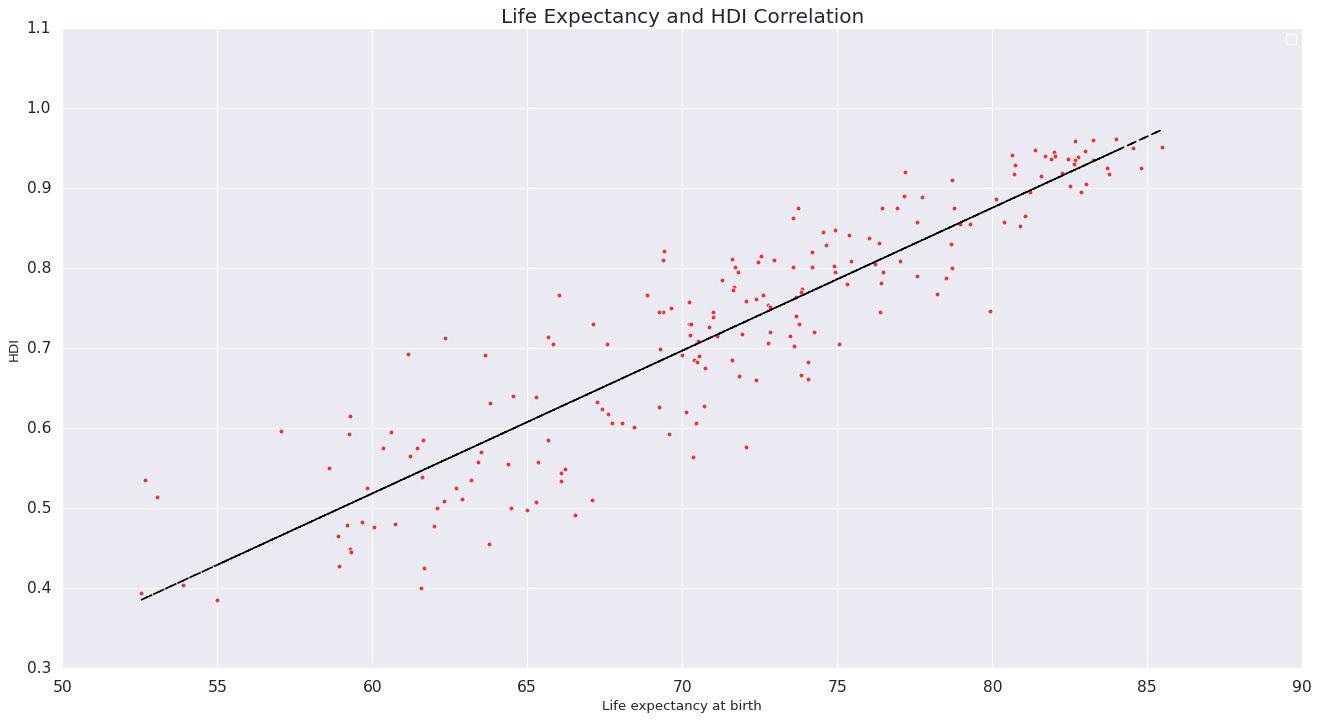

In [ ]:
hd.plot(kind="scatter", x="Life expectancy at birth", y="Human Development Index (HDI)", color="red",alpha=0.8)
z = np.polyfit(hd["Life expectancy at birth"], hd["Human Development Index (HDI)"], 1)
p = np.poly1d(z)
plt.plot(hd["Life expectancy at birth"], p(hd["Life expectancy at birth"]), "k--")
plt.legend(loc="best")
plt.xlabel("Life expectancy at birth")
plt.ylabel("HDI")
plt.title("Life Expectancy and HDI Correlation")
plt.show()

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='Human Development Index (HDI)'>

Text(0.5, 0, 'Gross national income (GNI) per capita')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Income and HDI Correlation')

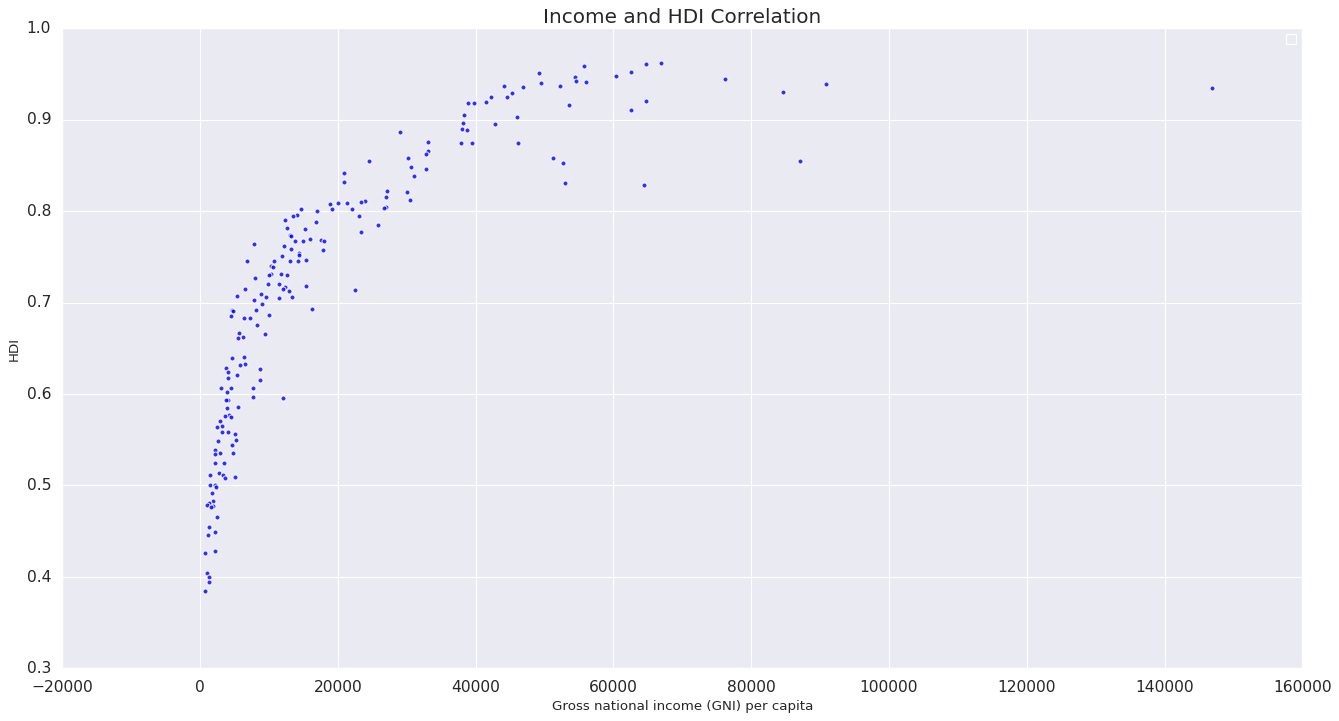

In [ ]:
hd.plot(kind="scatter", x="Gross national income (GNI) per capita", y="Human Development Index (HDI)", color="blue",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Gross national income (GNI) per capita")
plt.ylabel("HDI")
plt.title("Income and HDI Correlation")
plt.show()

<Axes: xlabel='Mean years of schooling', ylabel='Human Development Index (HDI)'>

Text(0.5, 0, 'Mean years of schooling')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Education and HDI Correlation')

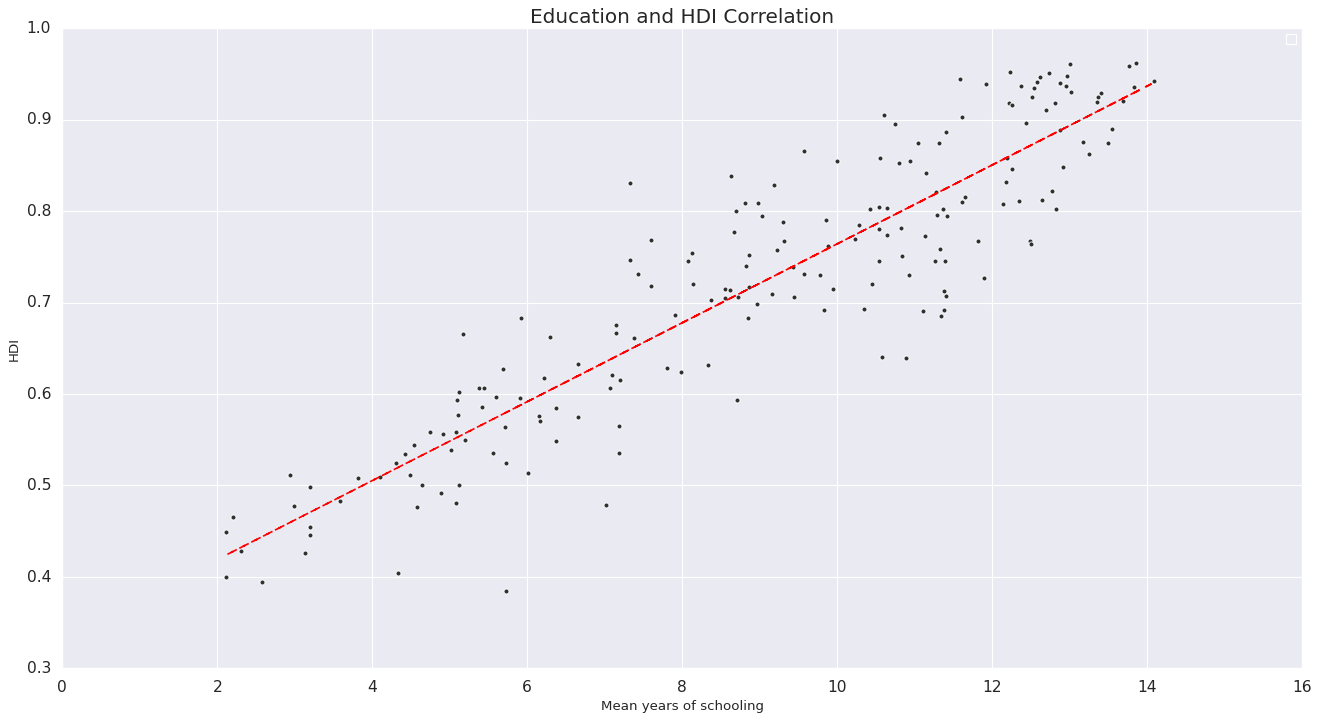

In [ ]:
hd.plot(kind="scatter", x="Mean years of schooling", y="Human Development Index (HDI)", color="black",alpha=0.8)
z = np.polyfit(hd["Mean years of schooling"], hd["Human Development Index (HDI)"], 1)
p = np.poly1d(z)
plt.plot(hd["Mean years of schooling"], p(hd["Mean years of schooling"]), "r--")
plt.legend(loc="best")
plt.xlabel("Mean years of schooling")
plt.ylabel("HDI")
plt.title("Education and HDI Correlation")
plt.show()

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='Life expectancy at birth'>

Text(0.5, 0, 'Gross national income (GNI) per capita')

Text(0, 0.5, 'Life expectancy at birth')

Text(0.5, 1.0, 'Income and Life Expectancy')

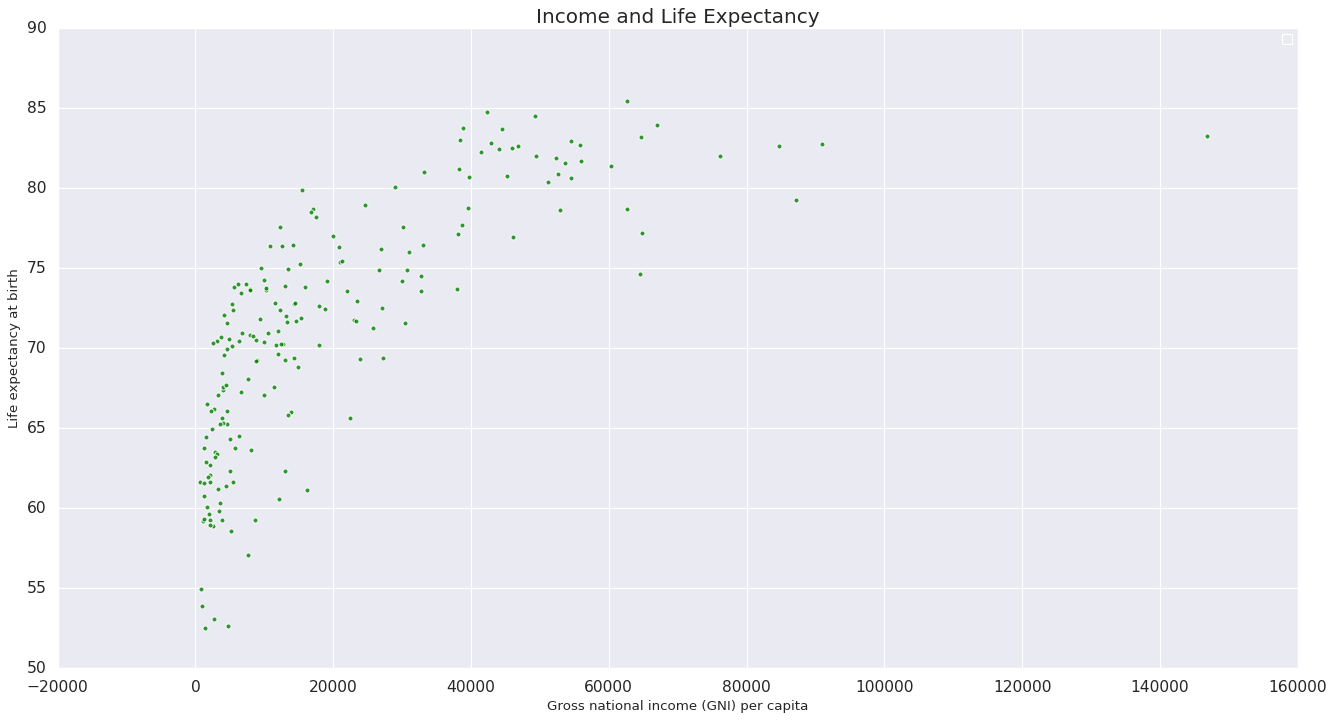

In [ ]:
hd.plot(kind="scatter", x="Gross national income (GNI) per capita", y="Life expectancy at birth", color="green",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Gross national income (GNI) per capita")
plt.ylabel("Life expectancy at birth")
plt.title("Income and Life Expectancy")
plt.show()

In [ ]:
hd.columns

Index(['HDI Rank', 'Country ', 'Human Development Index (HDI)',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [ ]:
hd = hd.rename(columns={'Country ': 'Country'})

In [ ]:
colorscale = [[0.0, 'rgb(230, 240, 255)'], [0.2, 'rgb(179, 209, 255)'], [0.4, 'rgb(102, 163, 255)'],\
              [0.6, 'rgb(26, 117, 255)'], [0.8, 'rgb(0, 71, 179)'], [1.0, 'rgb(0, 31, 77)']]
data = [dict(
        type='choropleth',
        locations=hd.Country,
        locationmode='country names',
        z=hd['Human Development Index (HDI)'],
        text=hd.Country,
        colorscale = colorscale,
        colorbar=dict(autotick=False, tickprefix='', title='Findex'),
)]
layout = dict(
            title = 'Human Development Index',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

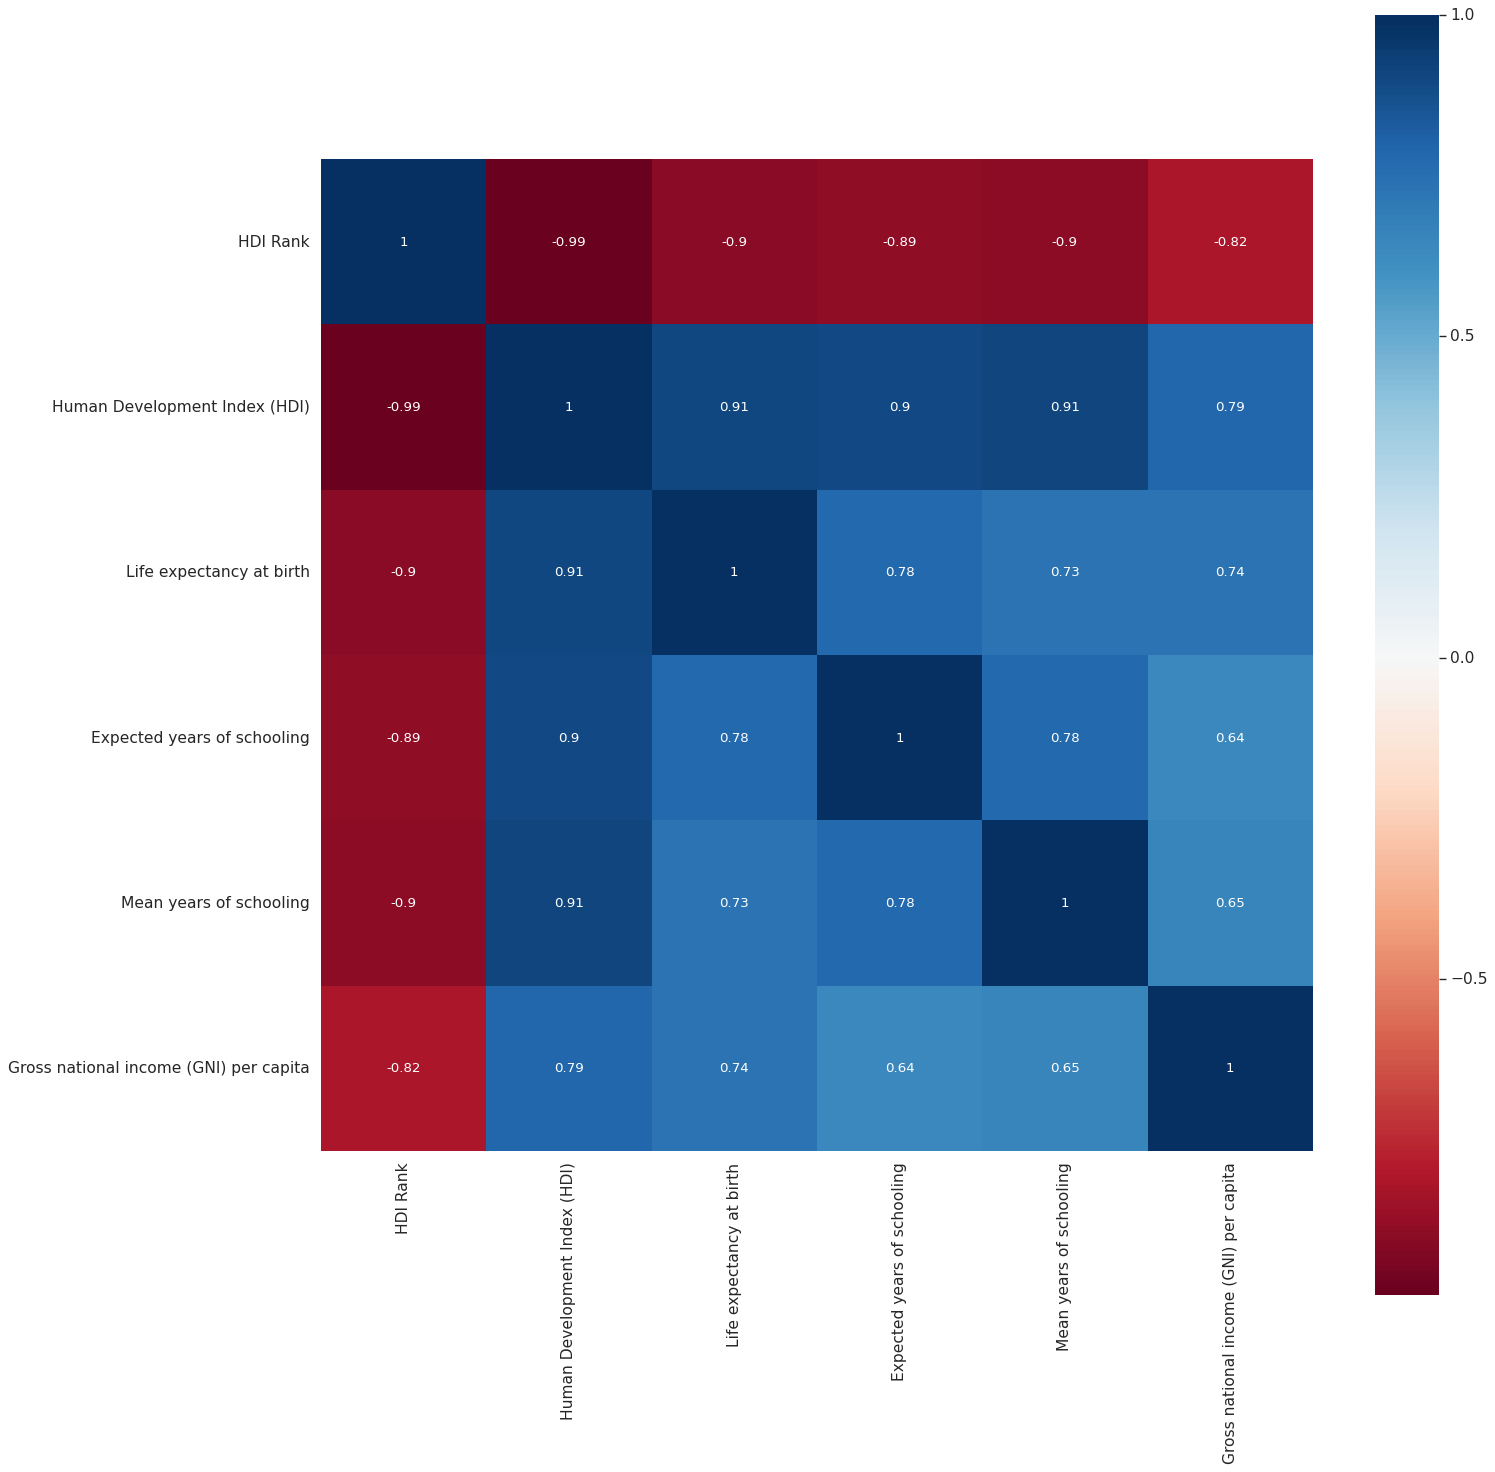

In [ ]:
import seaborn as sns

corrmat = hd.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

In [ ]:
countries = hd.loc[hd["Mean years of schooling"].sort_values(ascending=False).head(15).keys(), "Country"]


trace1 = go.Bar(
    x=countries.values,
    y=hd.loc[countries.keys(),"Gross national income (GNI) per capita"].head(15),
    name = "Top 15 Educated Countries",
    marker = dict(color = "rgba(0,170,255, 0.8)"),
    text = "Mean years of schooling : " + hd.loc[countries.keys(), "Mean years of schooling"].astype(str)
)

trace2 = go.Scatter(
    y = hd["Gross national income (GNI) per capita"],
    x = hd["Mean years of schooling"],
    name = "Education and Gross National Income (GNI) per Capita",
     xaxis='x2',
    yaxis='y2',
    mode = "markers",
    marker = dict(color = 'rgba(205,125,79, 0.5)'),
)


layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 1],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.55, 1],
        anchor='x2',
    ),
    title = "Top 15 Educated Countries And GNI per Capita",
    yaxis = dict(title = "Gross National Income (GNI) per Capita", ticklen = 5, zeroline = False),
    #hovermode='closest'
    legend=dict(x=-.1, y=1.12),
)

fig = go.Figure(data = [trace1,trace2], layout =  layout )
iplot(fig)

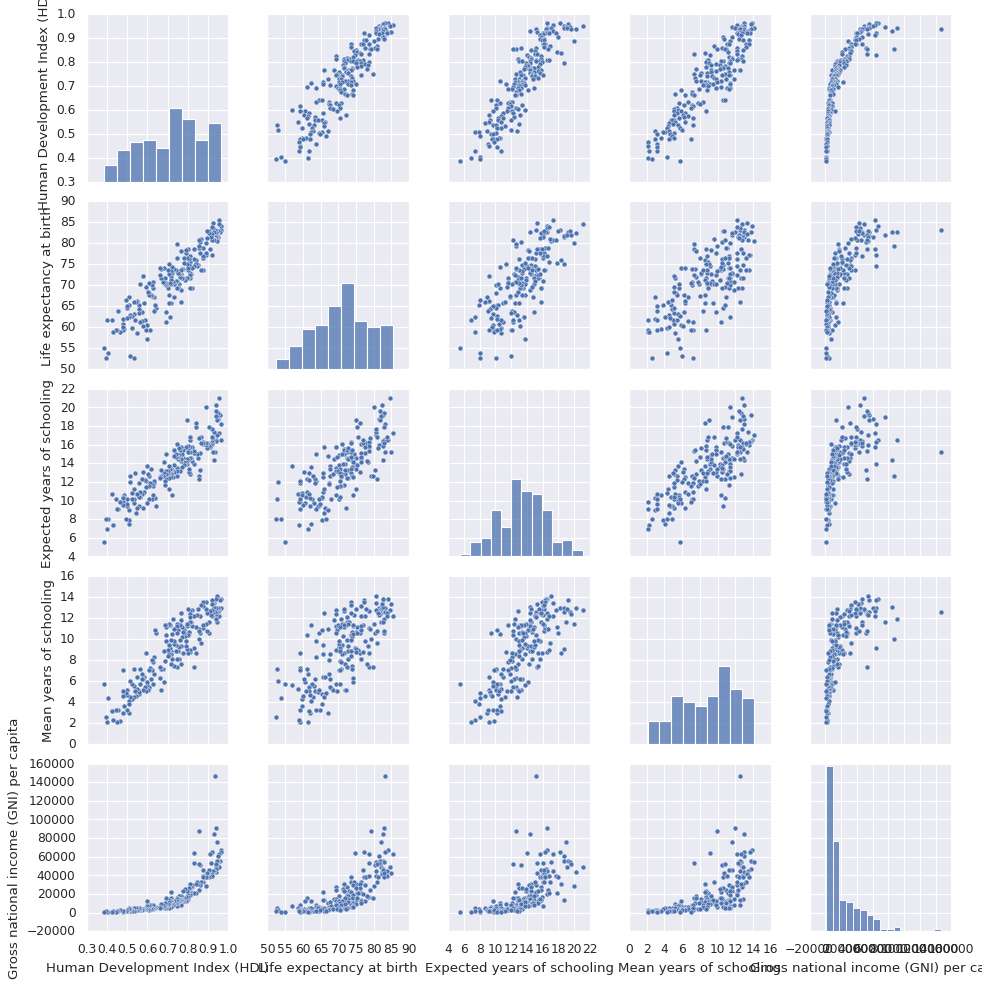

In [ ]:
sns.set()
cols = ['Human Development Index (HDI)',
        'Life expectancy at birth',
        'Expected years of schooling',
        'Mean years of schooling',
        'Gross national income (GNI) per capita']
sns.pairplot(hd[cols], height = 2.5)
plt.show();

<Axes: xlabel='Human Development Index (HDI)', ylabel='Density'>

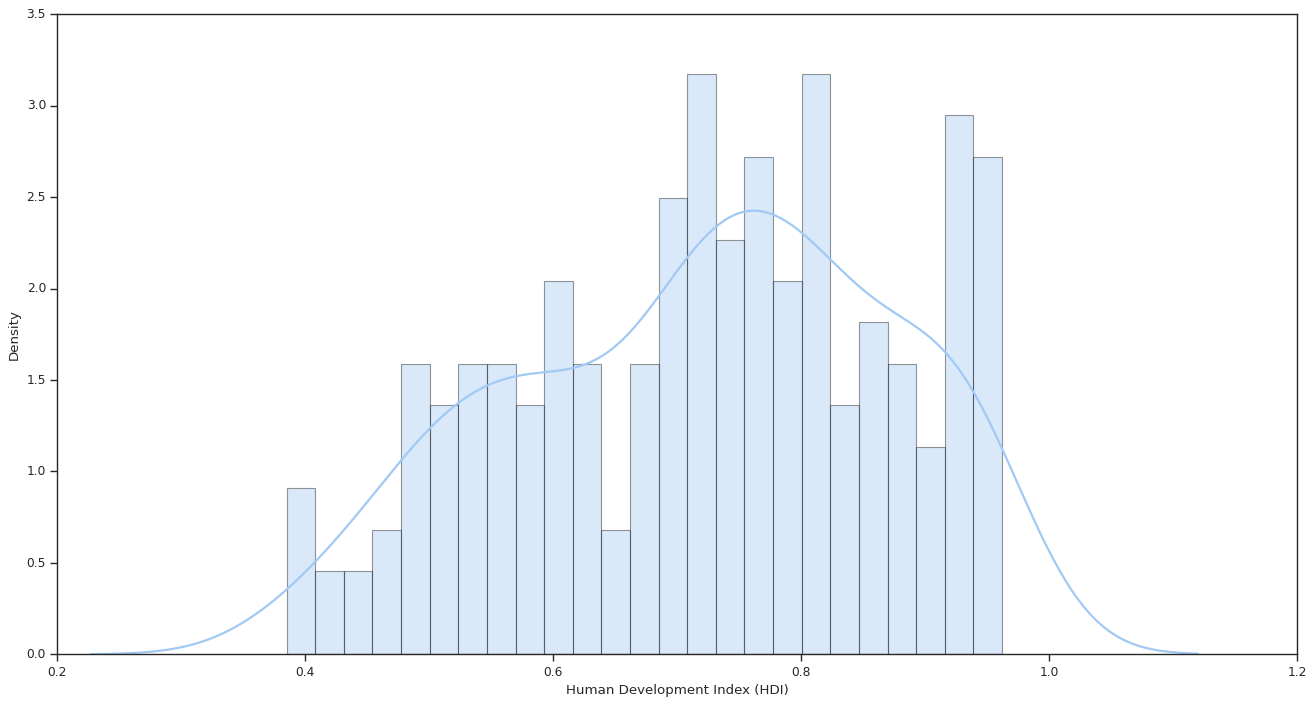

In [ ]:
sns.distplot(hd['Human Development Index (HDI)'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

<Axes: xlabel='Life expectancy at birth', ylabel='Density'>

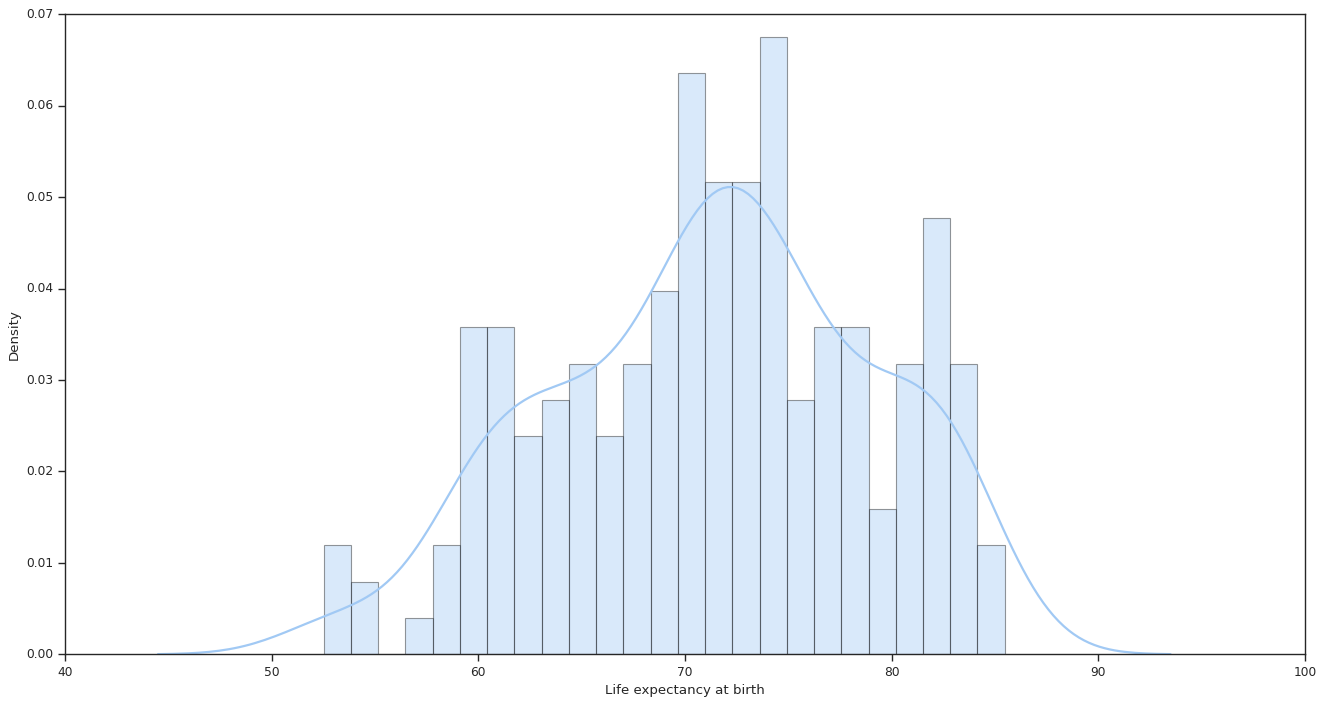

In [ ]:
sns.distplot(hd['Life expectancy at birth'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

<Axes: xlabel='Expected years of schooling', ylabel='Density'>

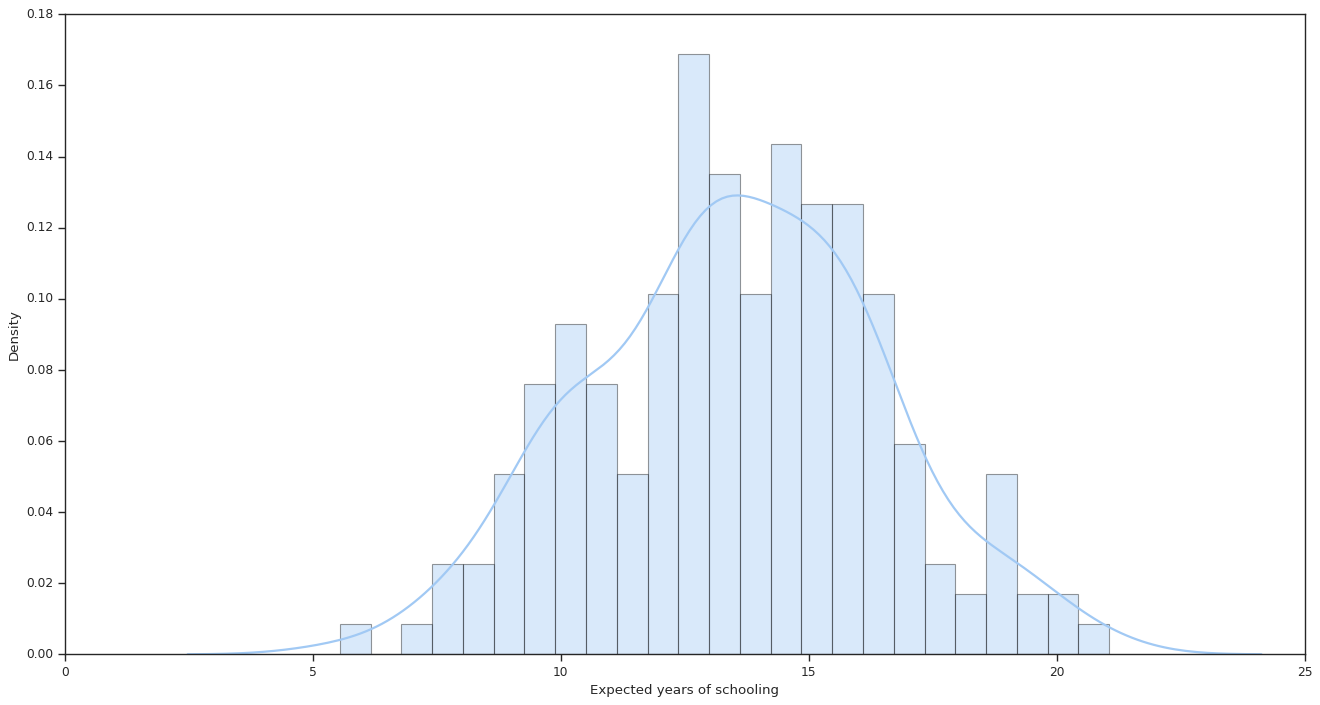

In [ ]:
sns.distplot(hd['Expected years of schooling'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

In [ ]:
sns.distplot(hd['Expected years of schooling'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

<Axes: xlabel='Mean years of schooling', ylabel='Density'>

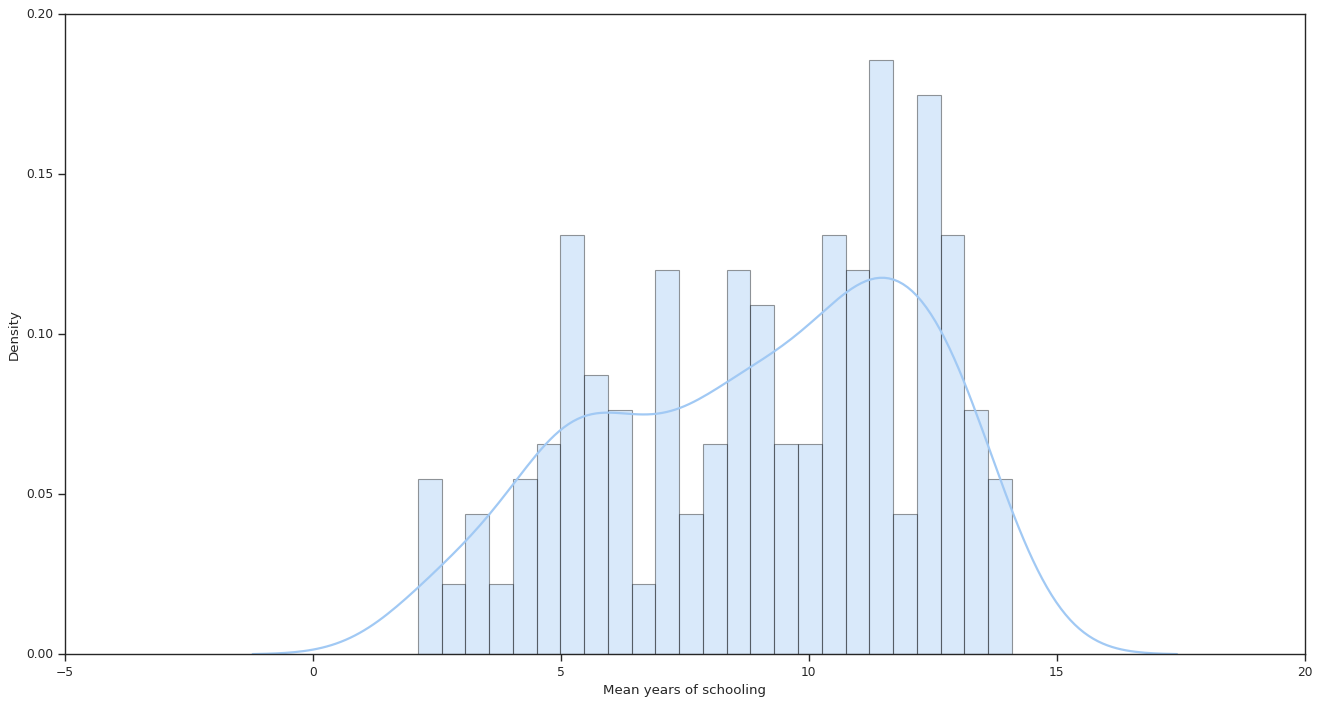

In [ ]:
sns.distplot(hd['Mean years of schooling'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='Density'>

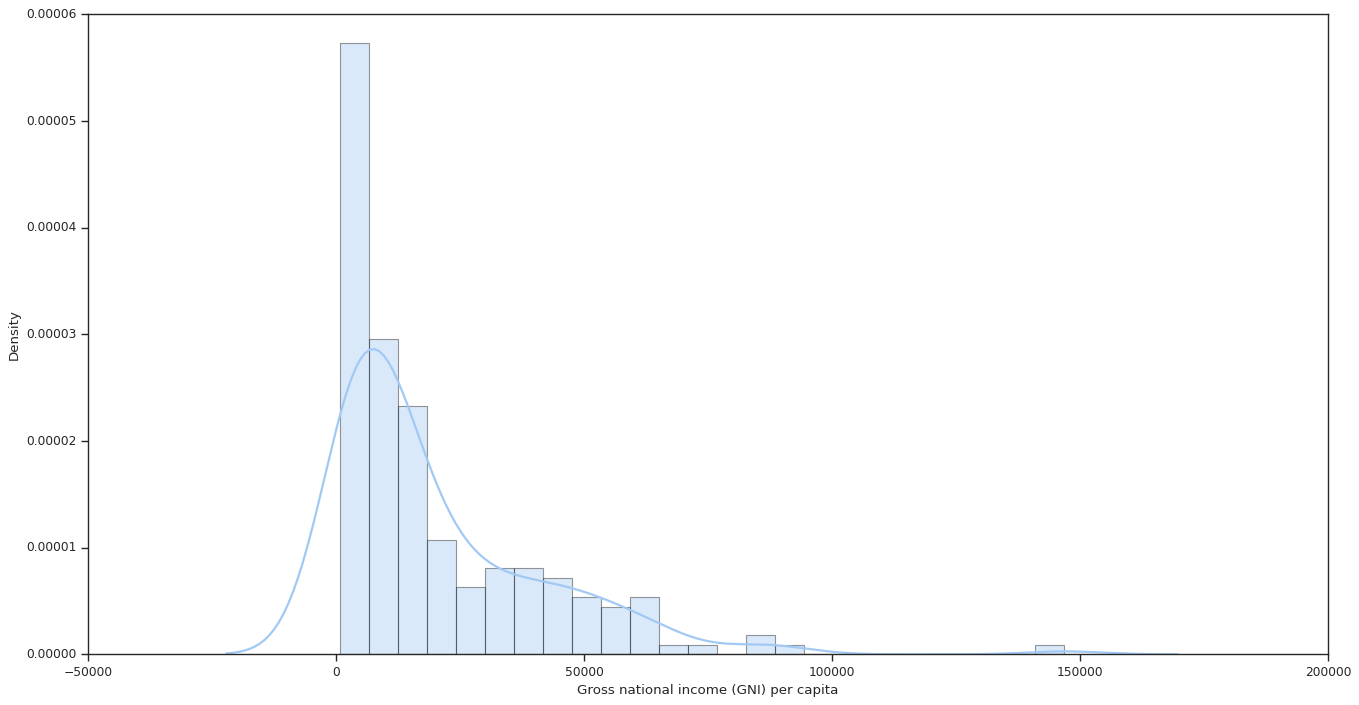

In [ ]:
sns.distplot(hd['Gross national income (GNI) per capita'], hist = True, kde = True, 
             bins = int(25), color = 'b', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 2})

Conclusion: It showed that there are strong correlations between HDI and its influencing factors: life expectancy, years of schooling, and income. Countries in which people have longer life expectancy, more years of schooling, and higher income have a higher rank in HDI. And the inequality between male and female is still obvious.

For the future researches and studies, since the dataset I chose is the 2021 HDI, GDI and GII, I think it could be an interesting research topic to put covid datasets in and to see if covid has a significant influence to HDI. During past several years, the debate on anti-covid policy was always controversial. I think it will be interesting to explore it through data.